<a href="https://colab.research.google.com/github/veeravasanthan/numpy_worksop/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [3]:

input_dim = x_train.shape[1]

latent_dim = 32

encoder_input = keras.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(encoder_input)
encoded = layers.Dense(latent_dim, activation='relu')(encoded)

decoder_input = keras.Input(shape=(latent_dim,))
decoded = layers.Dense(128, activation='relu')(decoder_input)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

encoder = keras.Model(encoder_input, encoded, name="encoder")


decoder = keras.Model(decoder_input, decoded, name="decoder")

autoencoder_input = keras.Input(shape=(input_dim,))
encoded_output = encoder(autoencoder_input)
decoded_output = decoder(encoded_output)
autoencoder = keras.Model(autoencoder_input, decoded_output, name="autoencoder")

autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       104,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       105,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.3310 - val_loss: 0.1494
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1411 - val_loss: 0.1228
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1203 - val_loss: 0.1108
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1105 - val_loss: 0.1053
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.1055 - val_loss: 0.1018
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1023 - val_loss: 0.0991
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0998 - val_loss: 0.0976
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0985 - val_loss: 0.0961
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0971 - val_loss: 0.0949
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0957 - val_loss: 0.0937
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0947 - val_loss: 0.0930
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

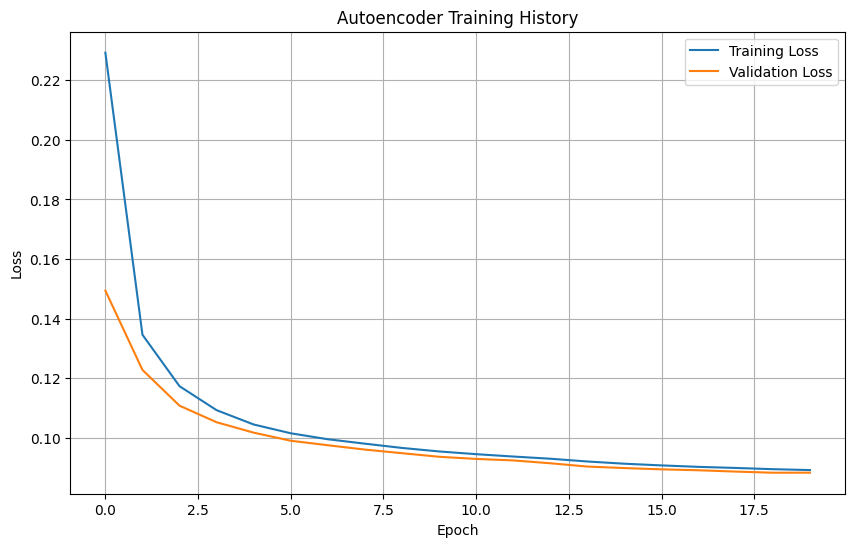

In [4]:


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


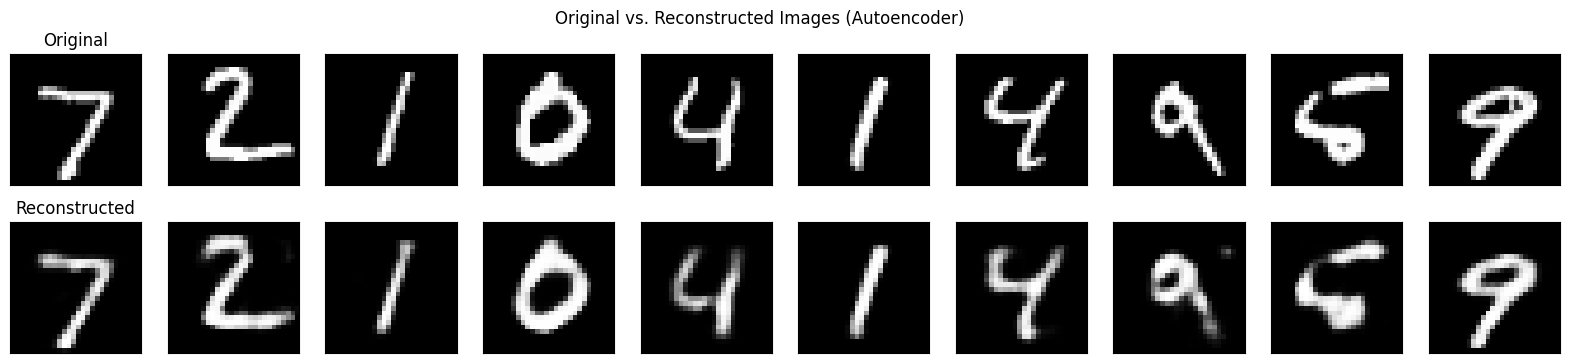

In [5]:

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Reconstructed')
plt.suptitle('Original vs. Reconstructed Images (Autoencoder)')
plt.show()